# Ejercicio 1: Suavizando una discreta

## 1 y 2

Hechos en papel

Link: 
[https://photos.app.goo.gl/AeLobMaSDW75aL6E7](https://photos.app.goo.gl/AeLobMaSDW75aL6E7)

$$\huge f^*_{S_h} (s) = \sum_{i=1}^n K \left( \frac{s-x_i}{h} \right) \frac{1}{nh}$$

## 3.

In [4]:
suavizado <- function(t, datos, h){
    n <- length(datos)
    K <- dnorm((t-datos)/h)
    f_Sh <- sum(K/(n*h))
    return(f_Sh)
}

In [5]:
suavizado(0.1, c(1,2,3), 3)

[1] 0.1064296

## 4.

In [6]:
data <- read.csv('./alturas_n_200.csv')
head(data)

altura,genero,contextura_madre,altura_madre
169.9,M,mediana,160.5
152.8,F,mediana,158.4
160.2,F,bajita,155.9
172.8,M,mediana,161.7
158.9,F,alta,165.5
169.7,M,mediana,162.0


In [69]:
data.alt.T <- data[,'altura']
data.alt.M <- data[data$genero=='M','altura']
data.alt.F <- data[data$genero=='F','altura']

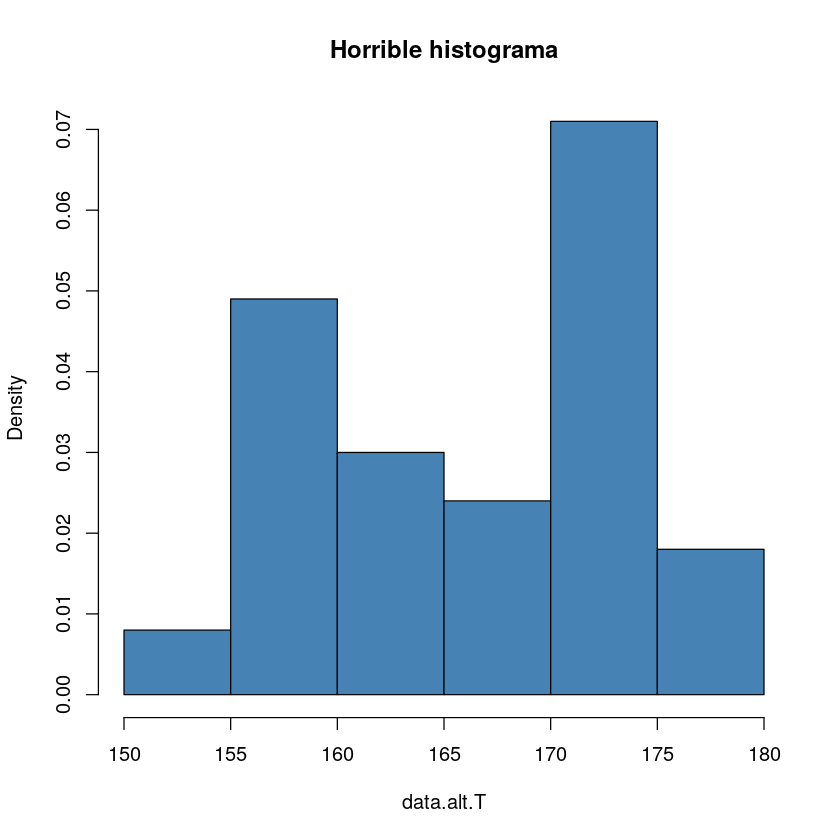

In [119]:
hist(data.alt.T, main="Horrible histograma", freq=F, col='steelblue')

In [123]:
n <- length(data.alt.T)
grid <- seq(135, 200, 0.1)
hs <- c(seq(0.1, 1.5, 0.1), seq(2, 10, 1), 50)
densi.suave <- data.frame(matrix(NA, length(grid), length(hs)))

In [124]:
head(densi.suave)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


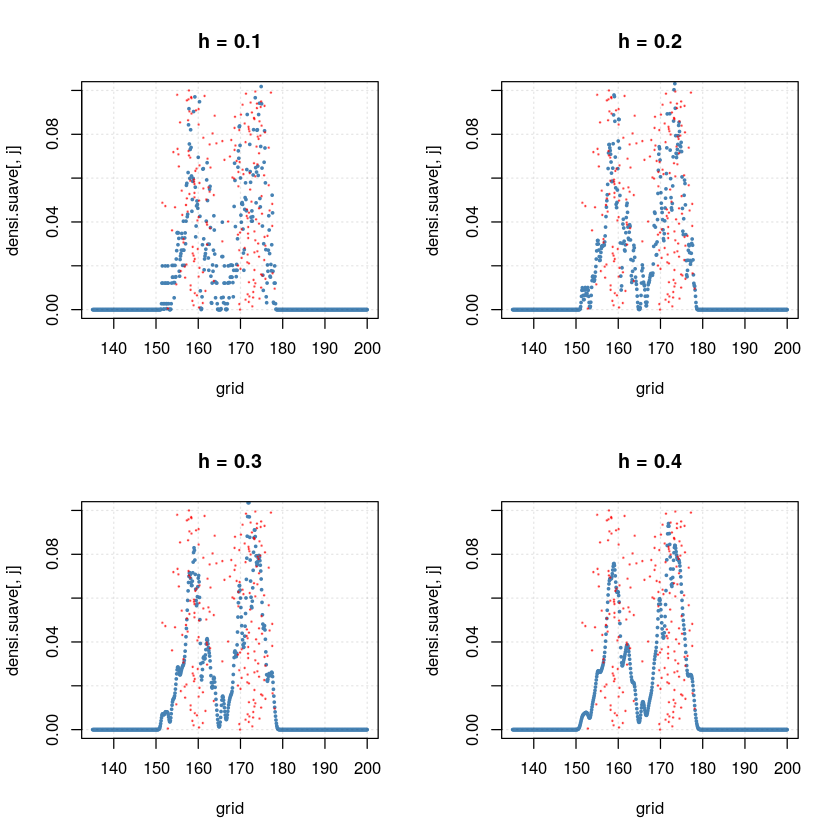

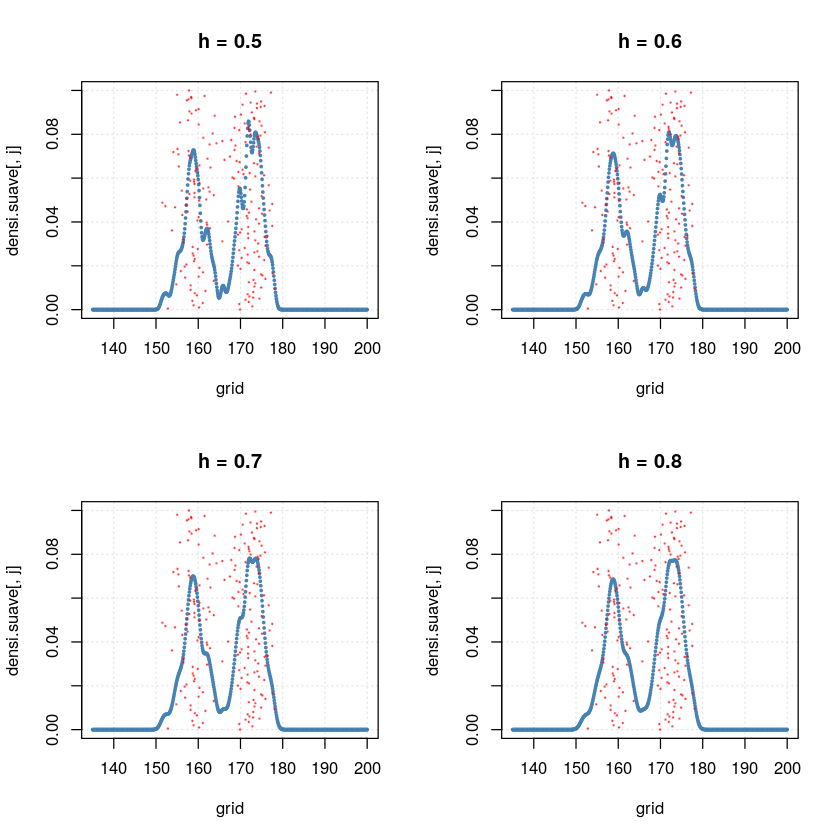

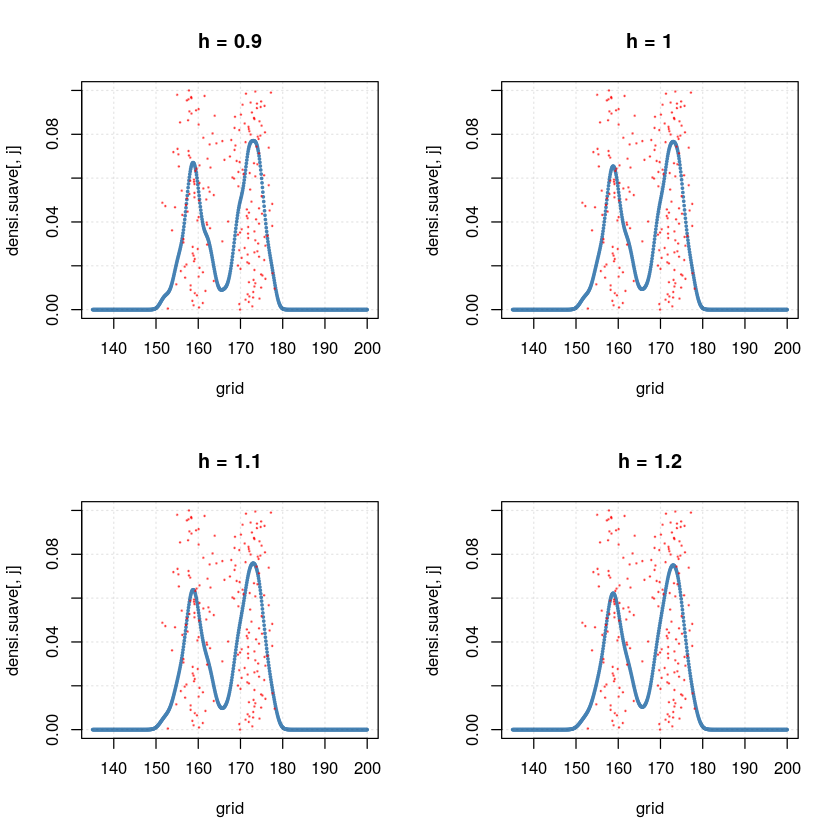

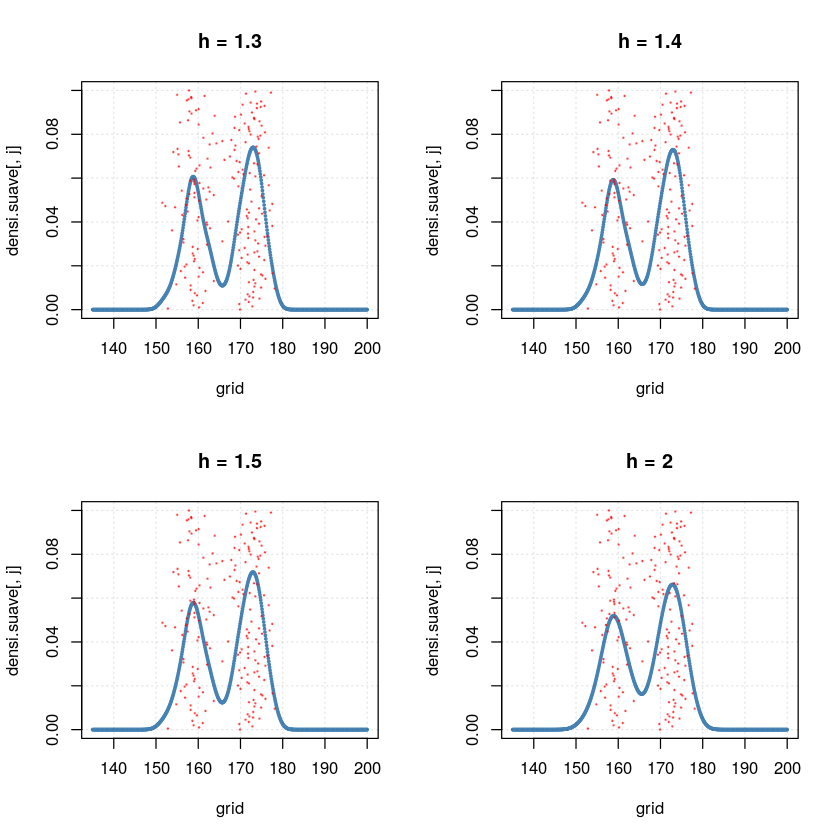

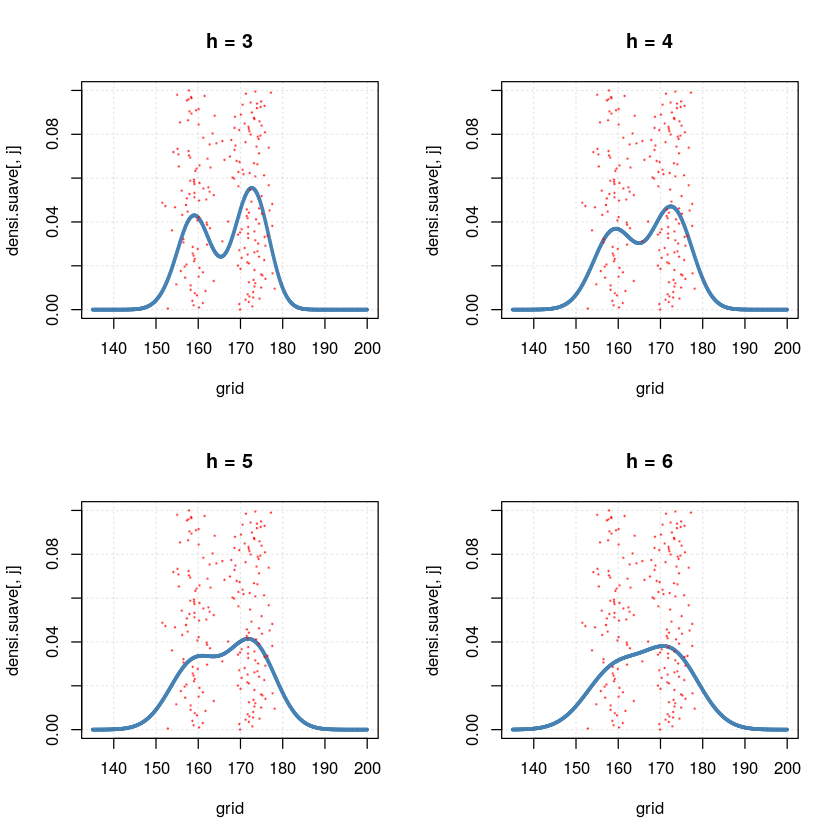

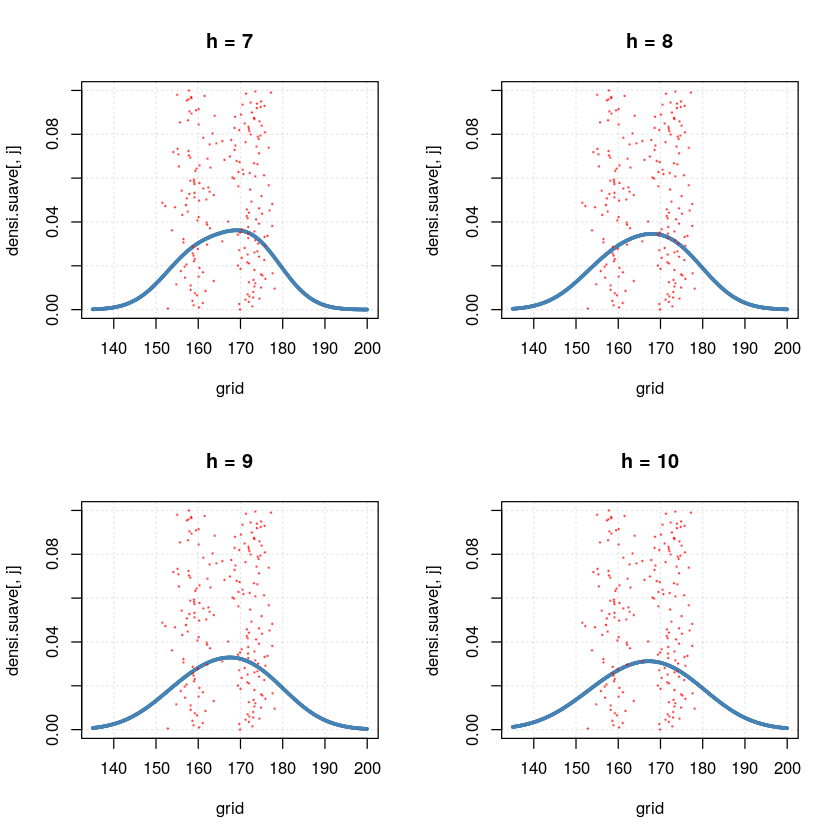

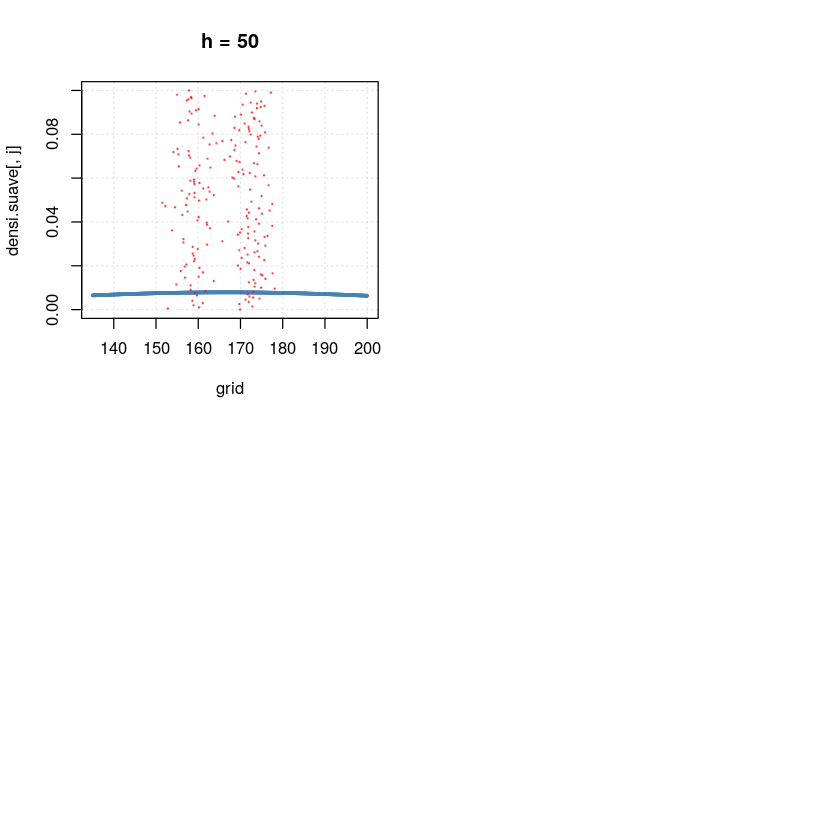

In [133]:
par(mfrow=c(2,2))
ymax <- 0.1
for(j in 1:length(hs)){
    for(i in 1:length(grid)){
        densi.suave[i, j] <-suavizado(grid[i], data.alt.T, hs[j])
    }
    plot(grid, densi.suave[,j], pch=20, cex=0.5 , ylim=c(0,ymax),main=paste("h =",hs[j]), col='steelblue')
    grid(col=rgb(0,0,0,0.1))
    points(data.alt.T, seq(0,ymax, length.out=length(data.alt.T)), pch=20, cex=0.3, col=rgb(1,0,0,0.5))
}

### Solo masculinos

In [134]:
n <- length(data.alt.M)
grid <- seq(135, 200, 0.1)
hs <- c(seq(0.1, 1.5, 0.1), seq(2, 10, 1))
densi.suave <- data.frame(matrix(NA, length(grid), length(hs)))

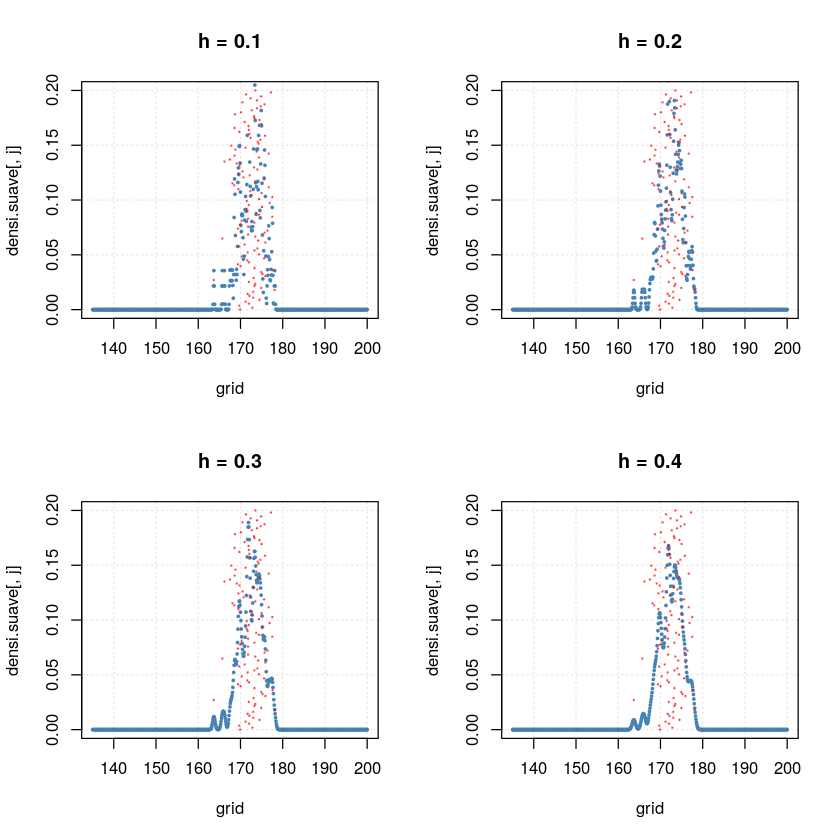

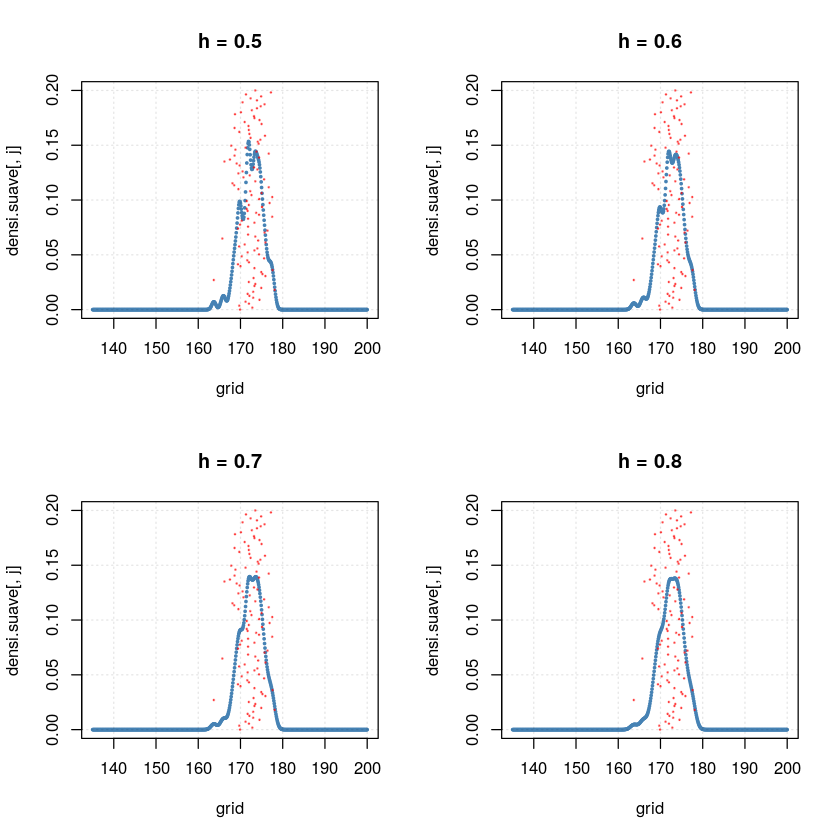

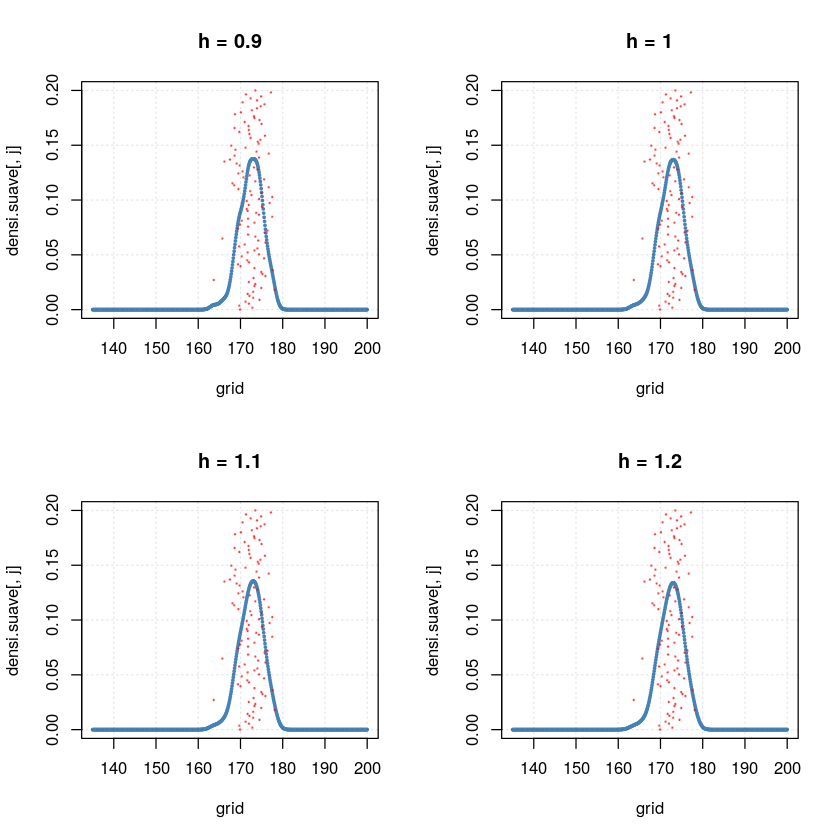

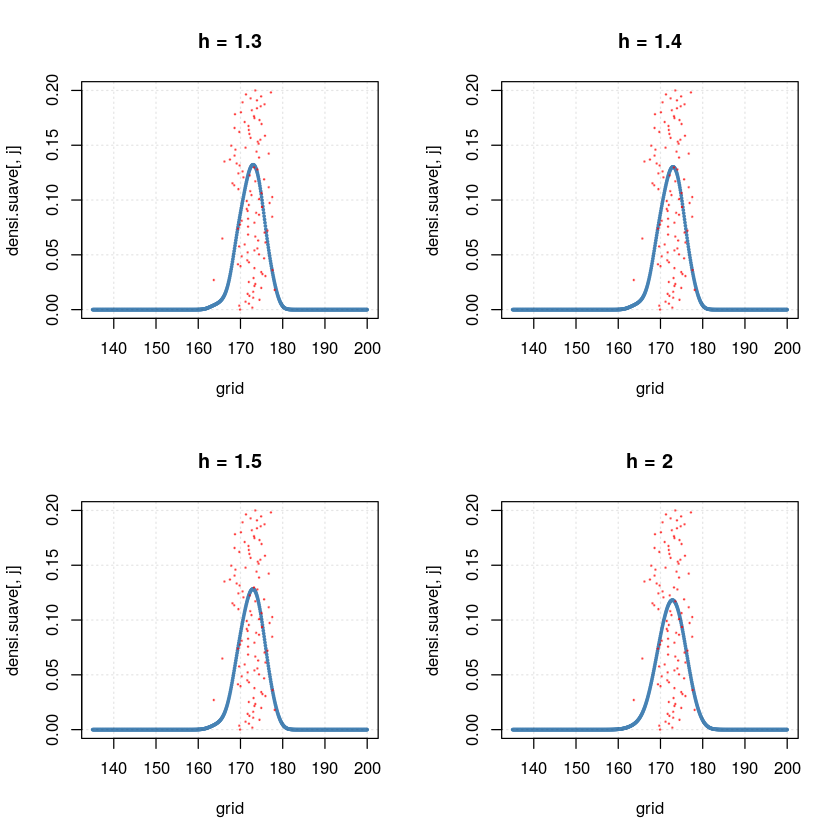

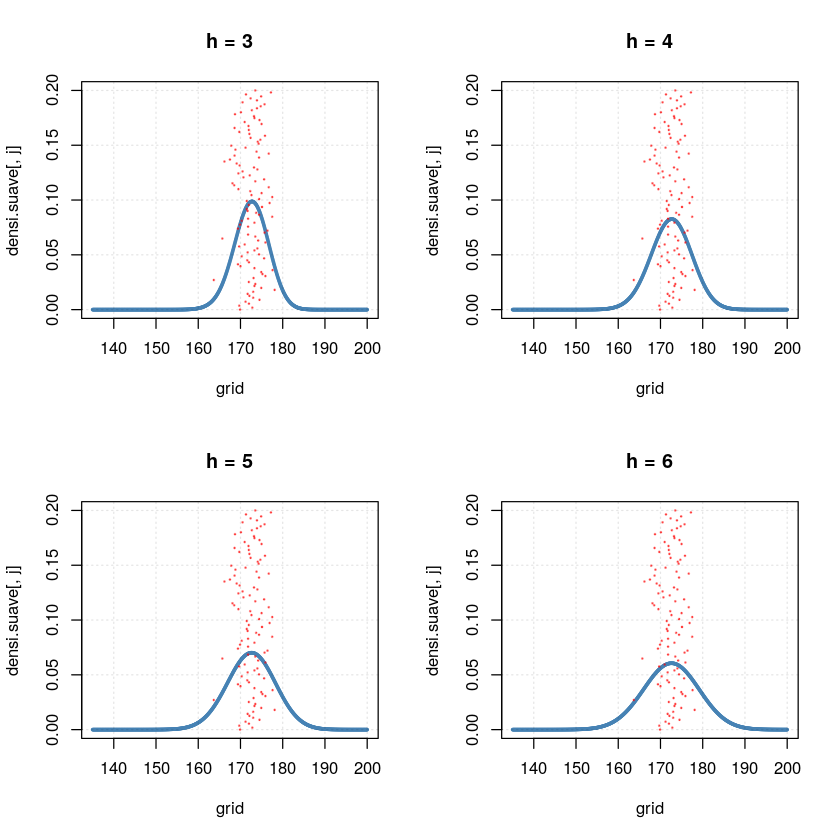

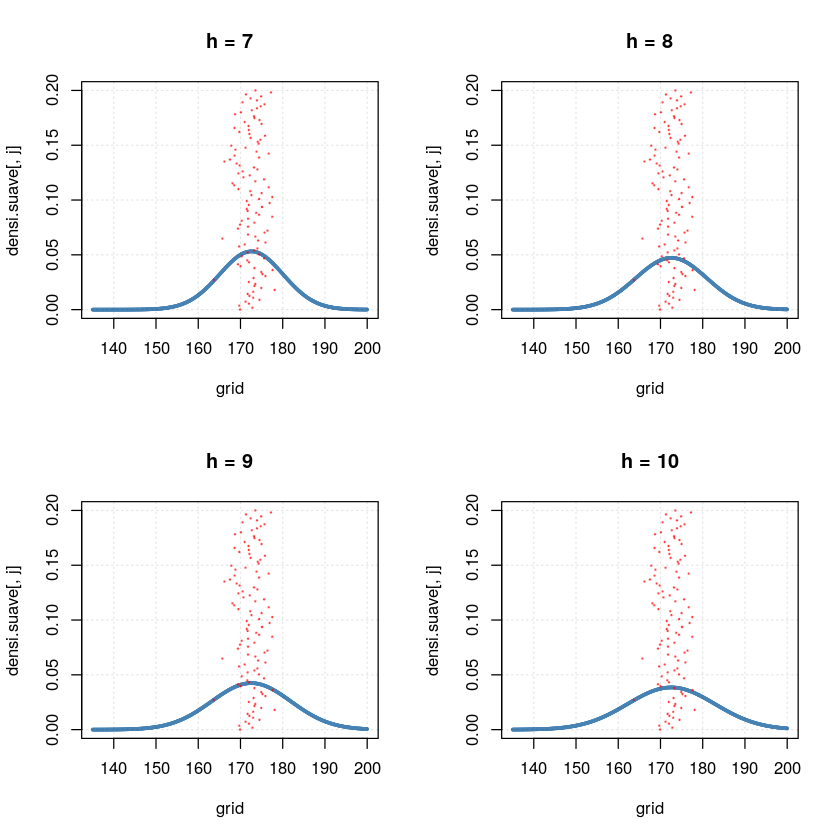

In [135]:
par(mfrow=c(2,2))
ymax <- 0.20
for(j in 1:length(hs)){
    for(i in 1:length(grid)){
        densi.suave[i, j] <-suavizado(grid[i], data.alt.M, hs[j])
    }
    
    plot(grid, densi.suave[,j], pch=20, cex=0.5 , ylim=c(0,ymax),main=paste("h =",hs[j]), col='steelblue')
    grid(col=rgb(0,0,0,0.1))
    points(data.alt.M, seq(0, ymax, length.out=length(data.alt.M)), pch=20, cex=0.3, col=rgb(1,0,0,0.5))
}